In [1]:
# Get better understanding of fingers placement (should do IK algo again)
# Get IK error in same time


from IPython.display import display, HTML 

class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for i,row in enumerate(self):
            html.append("<tr>")
            for col in row:
                if (i == 0):
                    html.append("<td><b>{0}</b></td>".format(col))
                else:
                    html.append("<td>{0}</td>".format(col))
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
    
    def printHTML(self):
        display(HTML(self._repr_html_()))

In [2]:
import CSVParser
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
%matplotlib inline

# Angles of fingers to analyse
# Decrease error joints controller

# Arm Structure
# $arm_base_length = 1.5
# $arm_shoulder_length = 0.1
# $arm_upperarm_length = 0.5
# $arm_elbow_length = 0.4
# $arm_forearm_length = 0.05
# $arm_wrist_length = 0.05
# $arm_hand_height = 0.05

class Vector(object):
    def __init__(self, x=0, y=0, z=0):
        self.x, self.y, self.z = x, y, z
    def __str__(self):
        return "(" + str(self.x) + "," + str(self.y) + "," + str(self.z) + ")"
    
class Contact(object):
    def __init__(self, name1, name2):
        if(name1.find('arm') != -1):
            self.name1, self.name2 = name1, name2
        else:
            self.name2, self.name1 = name1, name2
    def __str__(self):
        return "[" + self.name1 + " -- " + self.name2 + "]"

Positions = []
Quaters = []
Successes = []
SuccessesPos = []
NumReflexes = []
Contacts = []
Finger1 = []
Finger2 = []

baseOffset = 1.5
armLength = 1.25

# Parse the file
tab = CSVParser.GetCSVFromFile('../Data/grabbox(2016-05-19.18:40:29).csv')

for i, line in enumerate(tab):
    if line[0] == 'newiter':
        NumReflexes.append(0)
    elif line[0] == 'boxpos':
        string = line[1].split(" ")
        Positions.append(Vector(float(string[0]),float(string[1]),float(string[2])))
    elif line[0] == 'boxquater':
        Quaters.append(float(line[1].split(" ")[2]))
    elif line[0] == 'contact':
        Contacts.append(Contact(line[1], line[2]))
        NumReflexes[-1]+= 1
    elif line[0] == 'fingers':
        Finger1.append(float(line[1]))
        Finger2.append(float(line[2]))
    elif line[0] == 'reflex':
        pass
    elif line[0] == 'boxfinalpos':
        string = line[1].split(" ")
        SuccessesPos.append(Vector(float(string[0]),float(string[1]),float(string[2])))
        if float(line[1].split(" ")[2]) > 2:
            Successes.append(True)
        else:
            Successes.append(False)
        
print "Positions Length: " + str(len(Positions))
print "Quaters Length: " + str(len(Quaters))
print "Successes Length: " + str(len(Successes))
print "NumReflexes Length: " + str(len(NumReflexes))
print "Contacts Length: " + str(len(Contacts))
print "Finger1 Length: " + str(len(Finger1))
print "Finger2 Length: " + str(len(Finger2))
print ""

Positions Length: 4264
Quaters Length: 4264
Successes Length: 4264
NumReflexes Length: 4264
Contacts Length: 2097
Finger1 Length: 4264
Finger2 Length: 4264



Number of successes: 4206 (98.64%)

Positions of successes and fails:


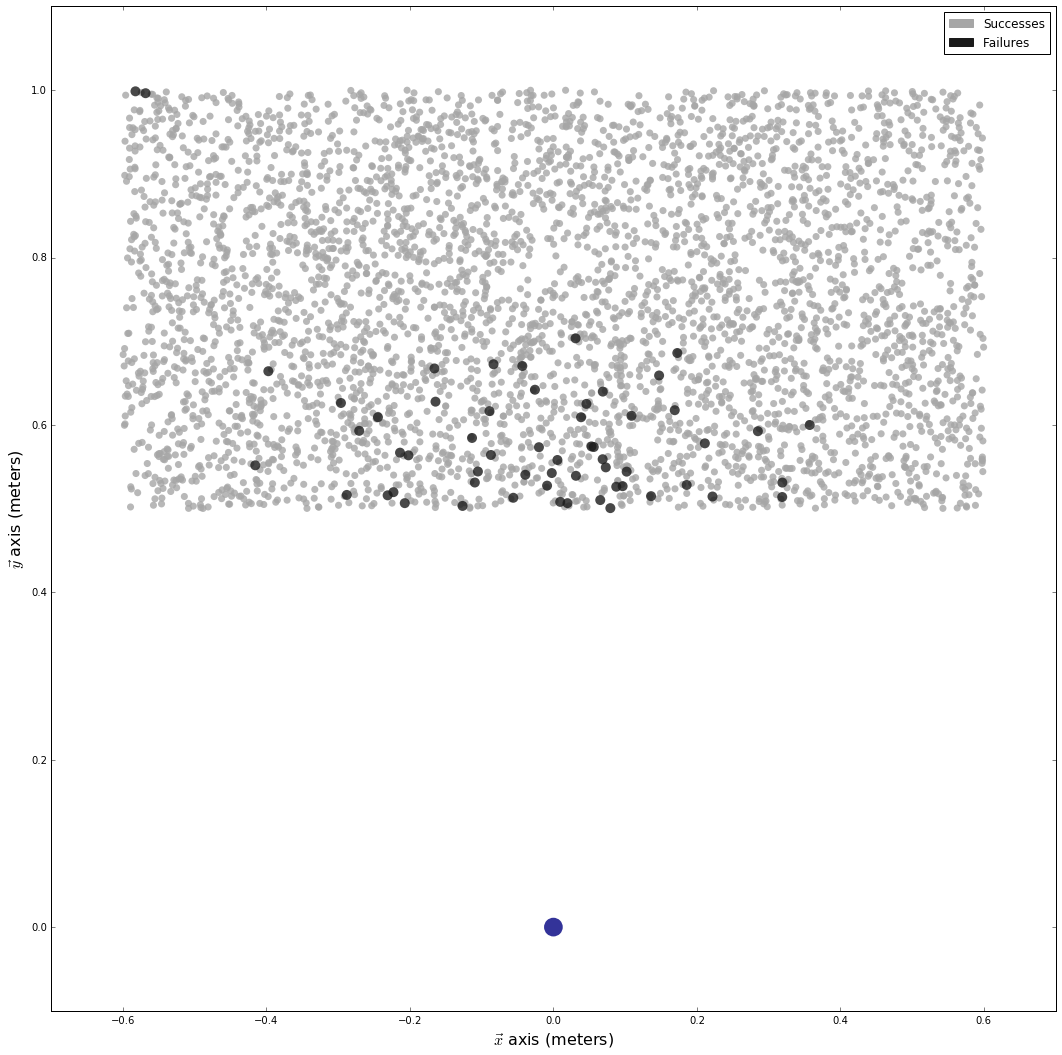

In [3]:
import matplotlib.patches as mpatches
print "Number of successes: " + str(sum(Successes)) + " (" + '{:.2%}'.format(float(sum(Successes))/float(len(Successes))) + ")"

tabXf = []
tabYf = []
colorf = []

tabXt = []
tabYt = []
colort = []

tableXmin = -0.6
tableXmax = 0.6
tableYmin = 0.0
tableYmax = 1.0

for i, vec in enumerate(Positions):
    if(Successes[i] == False):
        tabXf.append(vec.x)
        tabYf.append(vec.y)
        colorf.append(float(0.25))
    else:
        tabXt.append(vec.x)
        tabYt.append(vec.y)
        colort.append(float(0.75))

print ""
print "Positions of successes and fails:"
fig = plt.figure(figsize=(18,18))
plt.scatter(tabXt, tabYt, color='0.65', marker='o', s=50,alpha=0.8, edgecolor='none')
plt.scatter(tabXf, tabYf, color='0.10', marker='o', s=100,alpha=0.8, edgecolor='none')
plt.scatter([0], [0], color='0.99', marker='o', s=350,alpha=0.8, edgecolor='none')
plt.axis([tableXmin-0.1, tableXmax+0.1 , tableYmin-0.1, tableYmax+0.1])
plt.xlabel(r'$\vec{x}$ axis (meters)', fontsize=16, color='black')
plt.ylabel(r'$\vec{y}$ axis (meters)', fontsize=16, color='black')
patch1 = mpatches.Patch(color='0.65', label='Successes')
patch2 = mpatches.Patch(color='0.10', label='Failures')
plt.legend(handles=[patch1,patch2])
plt.show()




Quaters min: -3.14039
Quaters max: 3.14073
tabY min: 0.000144139638004
tabY max: 0.785151094147


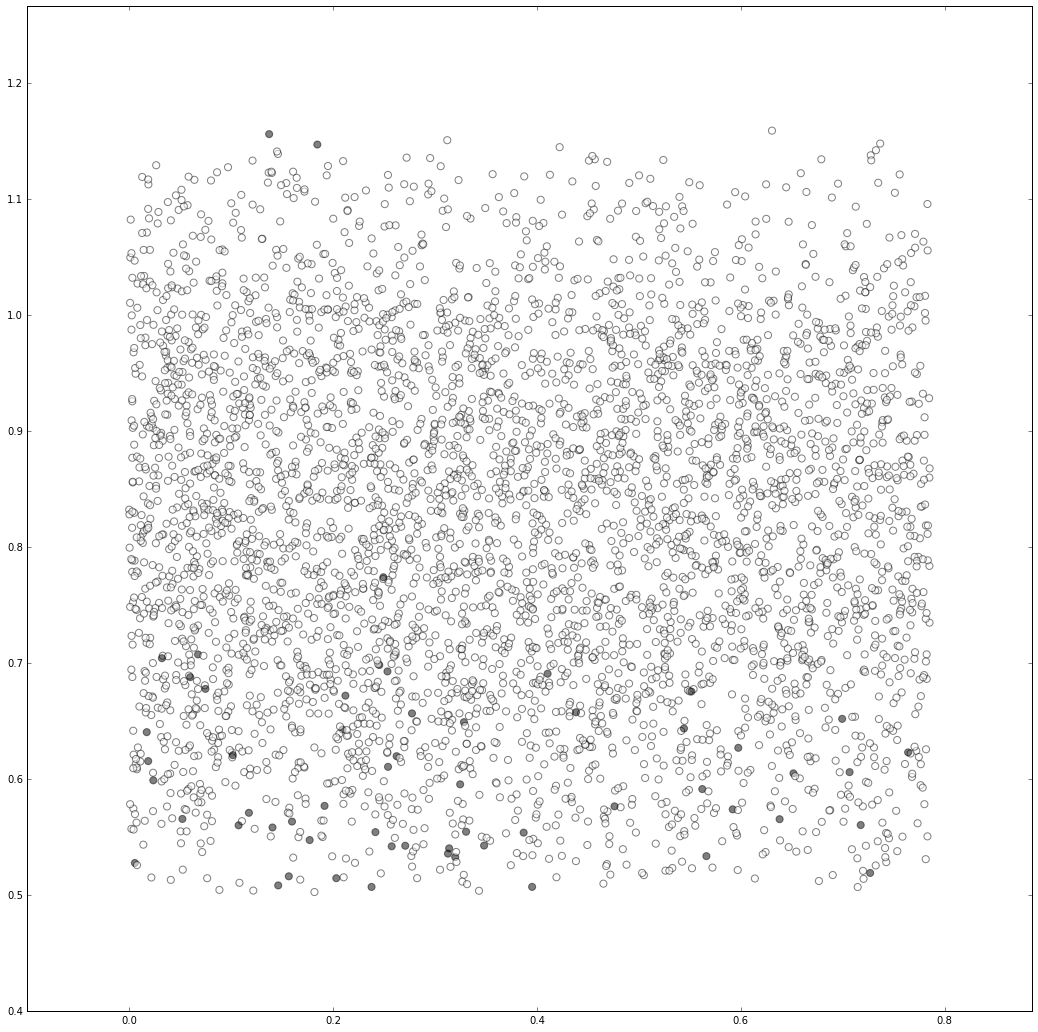

In [3]:
import numpy as np

tabX = []
tabY = []
color = []

print "Quaters min: " + str(min(Quaters))
print "Quaters max: " + str(max(Quaters))

tableXmin = 0.5
tableXmax = math.sqrt( math.pow(0.6,2) + math.pow(1,2) )
tableYmin = min(Quaters) 
tableYmax = max(Quaters)

for i, vec in enumerate(Positions):
    dist =  math.sqrt( math.pow(vec.x,2) + math.pow(vec.y,2) )
    tabX.append( dist )
    tabY.append(Quaters[i] - np.arcsin(vec.x/dist))
    color.append(float(Successes[i]))

# Filtering for symmetry
for i, val in enumerate(tabY):
    if(val < 0):
        tabY[i] = - val
    tabY[i] = tabY[i] - int( tabY[i] / (math.pi/4) ) * (math.pi/4)

tableYmin = min(tabY) 
tableYmax = max(tabY)
print "tabY min: " + str(min(tabY))
print "tabY max: " + str(max(tabY))

fig = plt.figure(figsize=(18,18))
color = [not x for x in color]
plt.scatter(tabY, tabX, c=color, cmap="Greys", marker='o', s=50,alpha=0.5)
plt.axis([tableYmin-0.1, tableYmax+0.1, tableXmin-0.1, tableXmax+0.1])
plt.show()

Distribution of reflexes per trial


Minimum Number of Reflexes,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,22
Number of trials,2937,979,230,44,22,12,11,7,5,4,2,1,2,1,1,2,1,1,1,1
Pourcentage,68.9%,23.0%,5.4%,1.0%,0.5%,0.3%,0.3%,0.2%,0.1%,0.1%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%


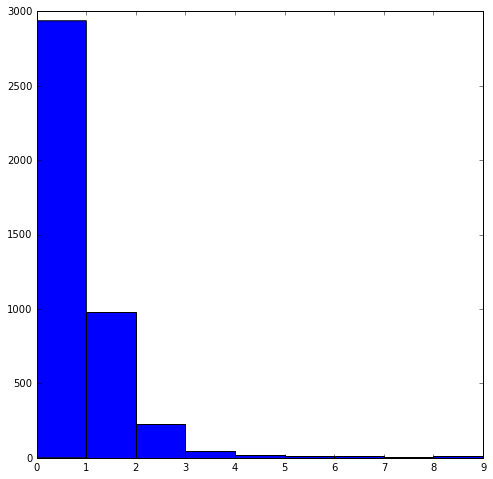

In [11]:
print "Distribution of reflexes per trial"
plt.figure(figsize=(8,8))
# the histogram of the data with histtype='step'
n, bins, patches = plt.hist(NumReflexes,bins = range(10), histtype='bar')
numSup = []
numExa = []
numSupIndex = []
j = -1
for i in range(max(NumReflexes)+1):
    if(i in NumReflexes):
        j += 1
        numSupIndex.append(i)
        numSup.append(0)
        numExa.append(0)
        for val in NumReflexes:
            if val >= i:
                numSup[j] += 1
            if val == i:
                numExa[j] += 1
                
table = ListTable()
numSupIndex = ['Minimum Number of Reflexes'] + numSupIndex
numSup = numExa
numExa = ['Number of trials'] + numExa
numSup = ['{:.1%}'.format((float(val)/4264)) for val in numSup]
numSup = ['Pourcentage'] + numSup
table.append(numSupIndex)
table.append(numExa)
table.append(numSup)
table.printHTML()

Positions for number of reflexes


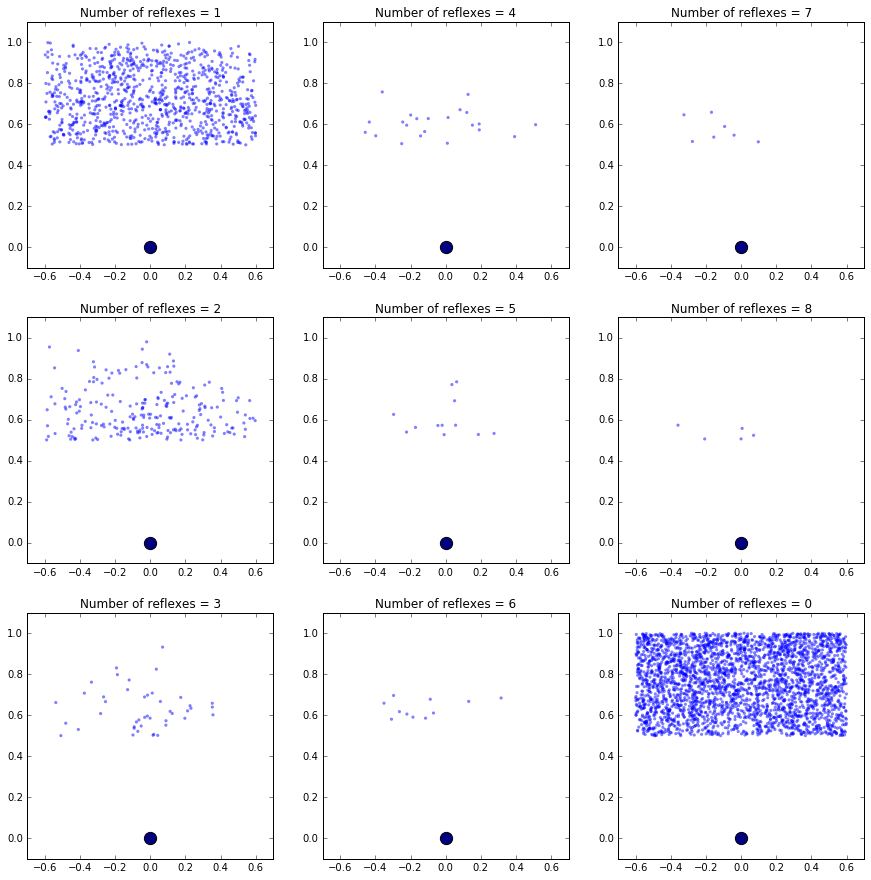

In [16]:
f, axarr = plt.subplots(3, 3)
f.set_size_inches((15,15))
print "Positions for number of reflexes"
for k in range(0,9):
    tabX = []
    tabY = []
    color = []

    tableXmin = -0.6
    tableXmax = 0.6
    tableYmin = 0.0
    tableYmax = 1.0

    for i, vec in enumerate(Positions):
        if NumReflexes[i] == k:
            tabX.append(vec.x)
            tabY.append(vec.y)
            #color.append(float(NumReflexes[i])/float(k))
    
    axarr[(k-1)%3,int((k-1)/3)].scatter(tabX, tabY, marker='o',edgecolor='none', s=10,alpha=0.5)#, c=color, cmap="Greys", )
    axarr[(k-1)%3,int((k-1)/3)].scatter([0], [0], c=[0.1], cmap="jet", marker='o', s=150)
    axarr[(k-1)%3,int((k-1)/3)].axis([tableXmin-0.1, tableXmax+0.1, tableYmin-0.1, tableYmax+0.1])
    axarr[(k-1)%3,int((k-1)/3)].set_title("Number of reflexes = " + str(k))

plt.show()

Distance and orientation for number of reflexes


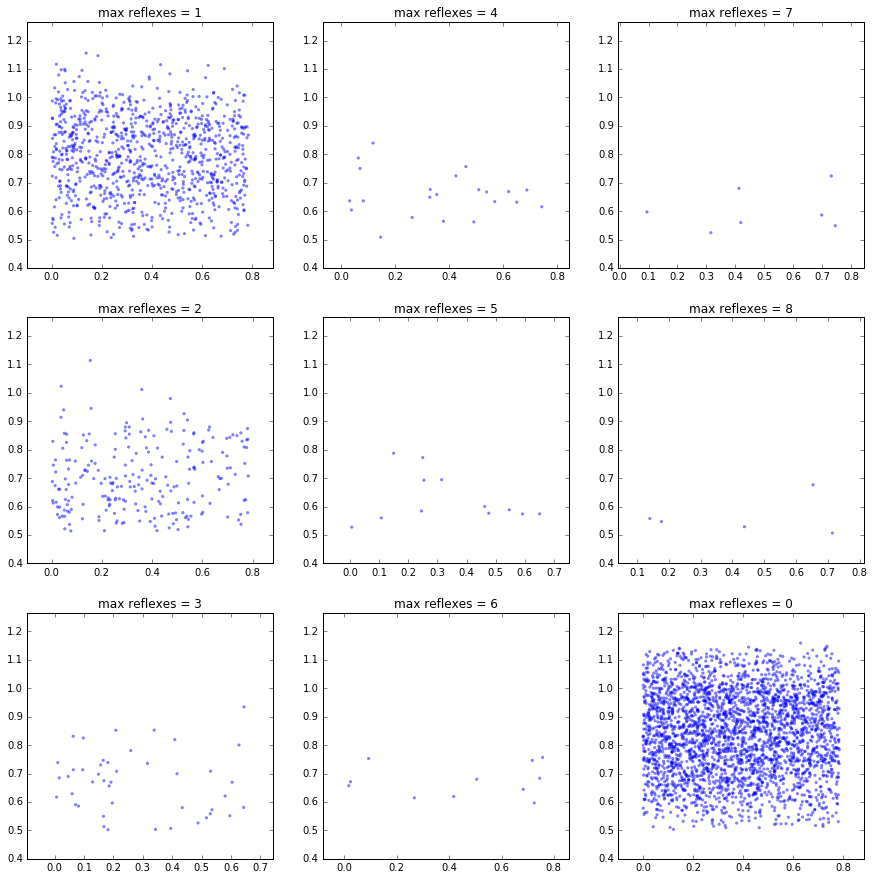

In [17]:
f, axarr = plt.subplots(3, 3)
f.set_size_inches((15,15))
print "Distance and orientation for number of reflexes"
for k in range(0,9):
    tabX = []
    tabY = []
    color = []
    for i, vec in enumerate(Positions):
        if NumReflexes[i] == k:
            dist =  math.sqrt( math.pow(vec.x,2) + math.pow(vec.y,2) )
            tabX.append( dist )
            tabY.append(Quaters[i] - np.arcsin(vec.x/dist))
            #color.append(float(NumReflexes[i])/float(k))
            
    # Filtering for symmetry
    for i, val in enumerate(tabY):
        if(val < 0):
            tabY[i] = - val
        tabY[i] = tabY[i] - int( tabY[i] / (math.pi/4) ) * (math.pi/4)
    
    tableXmin = 0.5
    tableXmax = math.sqrt( math.pow(0.6,2) + math.pow(1,2) )
    tableYmin = min(tabY) 
    tableYmax = max(tabY)
    
    
    
    axarr[(k-1)%3,int((k-1)/3)].scatter(tabY, tabX, marker='o',edgecolor='none', s=10,alpha=0.5)
    axarr[(k-1)%3,int((k-1)/3)].axis([tableYmin-0.1, tableYmax+0.1, tableXmin-0.1, tableXmax+0.1])
    axarr[(k-1)%3,int((k-1)/3)].set_title("max reflexes = " + str(k))
    
plt.show()

In [18]:
print "Focusing on failures"


failIndexes = [i for i, elem in enumerate(Successes) if not elem]
failReflexes = [NumReflexes[i] for i in failIndexes]
failPosvec = [SuccessesPos[i] for i in failIndexes]
failPos = [SuccessesPos[i].__str__() for i in failIndexes]


table = ListTable()
table.append(['Indexes', 'Num of reflexes', 'Final position of the box', 'Finger1', 'Finger2' ])
for i,val in enumerate(failIndexes):
    table.append([failIndexes[i], failReflexes[i], failPos[i], Finger1[failIndexes[i]], Finger2[failIndexes[i]]])
table.printHTML()

successIndexes = [i for i, elem in enumerate(Successes) if elem]
successReflexes = [NumReflexes[i] for i in successIndexes]

print "Mean for failures: " + str( reduce(lambda x, y: float(x) + float(y), failReflexes) / len(failReflexes) )
print "Mean for successes: " + str( reduce(lambda x, y: float(x) + float(y), successReflexes) / len(successReflexes) )
print "Mean for all: " + str( reduce(lambda x, y: float(x) + float(y), NumReflexes) / len(NumReflexes) )


numTable = 0
numFloor = 0

for val in failPosvec:
    if(val.z > 1):
        numTable += 1
    else:
        numFloor += 1
        
print "Number of trials ended on the table: " + str(numTable)
print "Number of trials ended on the floor: " + str(numFloor)

Focusing on failures


Indexes,Num of reflexes,Final position of the box,Finger1,Finger2
23,1,"(0.037697,0.561621,1.08999)",0.407316,-1.18087
240,1,"(-0.247188,0.612041,1.08999)",0.394753,-1.19504
257,0,"(4.89935,1.54201,0.07499)",0.458912,-1.11616
289,1,"(0.138363,0.513292,1.08999)",0.391206,-1.19911
307,1,"(-0.00655,0.6279,1.08999)",0.392735,-1.2
364,1,"(0.357844,0.600025,1.08999)",0.525422,-1.04272
402,2,"(0.187783,0.574591,1.09)",0.463903,-1.11404
443,1,"(-0.119424,0.580537,1.08999)",0.390966,-1.19966
534,0,"(0.258773,0.686876,1.08999)",0.582583,-0.975544
587,1,"(-0.107175,0.52683,1.08999)",0.640103,-0.917724


Mean for failures: 1.74137931034
Mean for successes: 0.474560152164
Mean for all: 0.491791744841
Number of trials ended on the table: 56
Number of trials ended on the floor: 2


In [19]:
print "Focus on Contacts"

armList = []
otherList = []

for val in Contacts:
    if val.name1 not in armList:
        armList.append(val.name1)
    if val.name2 not in otherList:
        otherList.append(val.name2)
        
armList.sort()
otherList.sort()

armMat = []
for i,val in enumerate(armList):
    armMat.append([val])
    for elt in otherList:
        armMat[i].append(0)
    
for val in Contacts:
    armMat[armList.index(val.name1)][otherList.index(val.name2) + 1] += 1
    
tab = []
tab.append(['  '] + otherList)
for val in armMat:
    tab.append(val)

table = ListTable()
for val in tab:
    table.append(val)
table.printHTML()

Focus on Contacts


,boxlink_collision,table
arm_forearm_collision,9,0
arm_hand_collision,170,17
arm_left-finger-1_collision,93,6
arm_left-finger-2_collision,330,65
arm_left-finger-touch-1_collision,39,1
arm_left-finger-touch-2_collision,258,68
arm_left-finger-touch-3_collision,72,4
arm_right-finger-1_collision,116,0
arm_right-finger-2_collision,157,25
arm_right-finger-touch-1_collision,82,0


In [20]:
print "Fingers angles"

print "1 min: " + str(min(Finger1))
print "1 max: " + str(max(Finger1))
print "2 min: " + str(min(Finger2))
print "2 max: " + str(max(Finger2))

Fingers angles
1 min: 0.186337
1 max: 1.19998
2 min: -1.2
2 max: -0.174295


Mean for success finger 1: 0.748917443176
Mean for success finger 2: -0.811718447218
Mean for success fingers diff: -0.0628010040418

Mean for failure finger 1: 0.579345
Mean for failure finger 2: -0.985698586207
Mean for success fingers diff: -0.406353586207


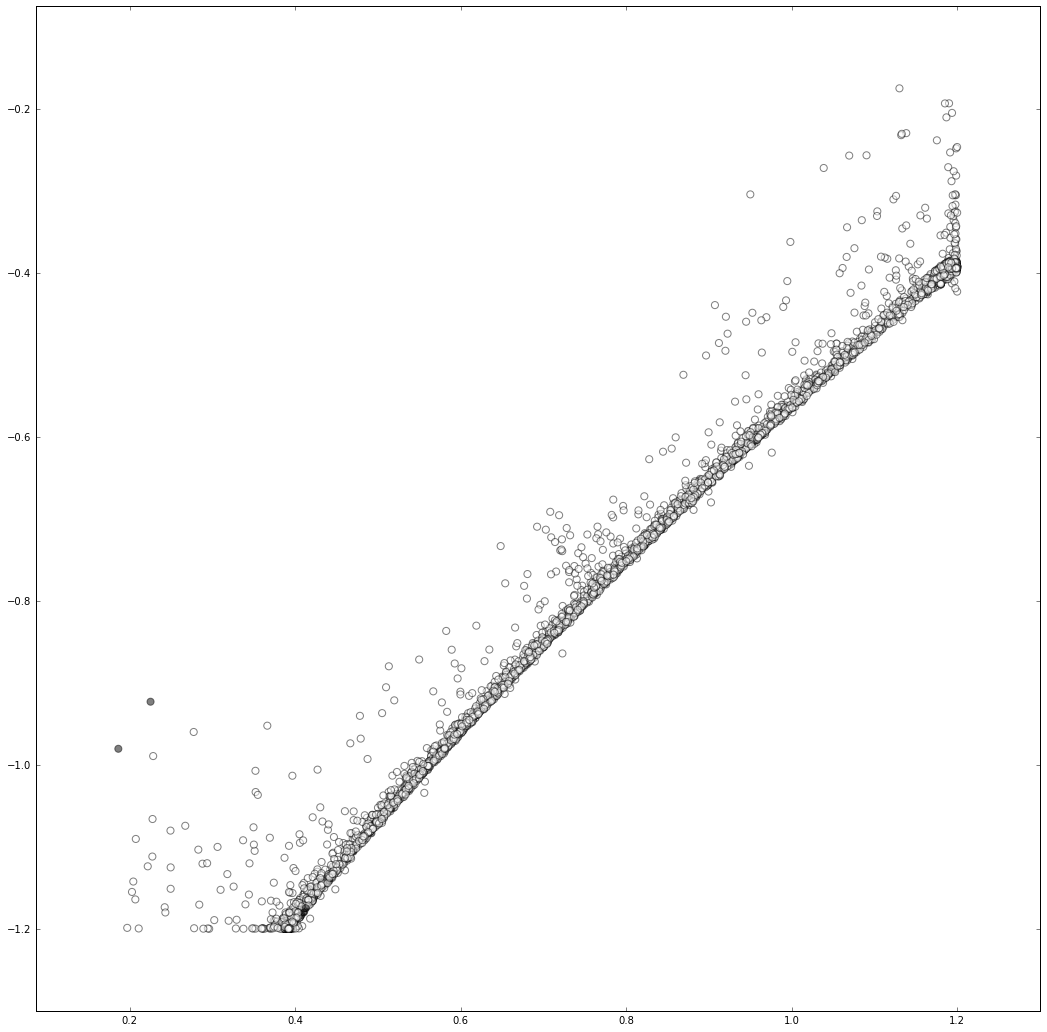

In [21]:
su1 = 0
su2 = 0
su = 0
fa1 = 0
fa2 = 0
fa = 0
nfa = 0
nsu = 0

for i,val in enumerate(Successes):
    if(val == True):
        su1 += Finger1[i]
        su2 += Finger2[i]
        su += Finger1[i] + Finger2[i]
        nsu += 1
    else:
        fa1 += Finger1[i]
        fa2 += Finger2[i]
        fa += Finger1[i] + Finger2[i]
        nfa += 1
        
print "Mean for success finger 1: " + str( float(su1)/float(nsu) )
print "Mean for success finger 2: " + str( float(su2)/float(nsu) )
print "Mean for success fingers diff: " + str( float(su)/float(nsu) )
print ""
print "Mean for failure finger 1: " + str( float(fa1)/float(nfa) )
print "Mean for failure finger 2: " + str( float(fa2)/float(nfa) )
print "Mean for success fingers diff: " + str( float(fa)/float(nfa) )


fig = plt.figure(figsize=(18,18))
color = [x for x in Successes]
plt.scatter(Finger1, Finger2, c=color, cmap="gray", marker='o', s=50,alpha=0.5)
plt.axis([min(Finger1)-0.1, max(Finger1)+0.1, min(Finger2)-0.1, max(Finger2)+0.1])
plt.show()

How many failures due to finger angles limits ?
result: 30 (0.70%)
number of failures in general: 58

What are the other failures ?
Number of trials ended on the table: 26
Number of trials ended on the floor: 2
Max num of reflexes for failures: 8
Min num of reflexes for failures: 0


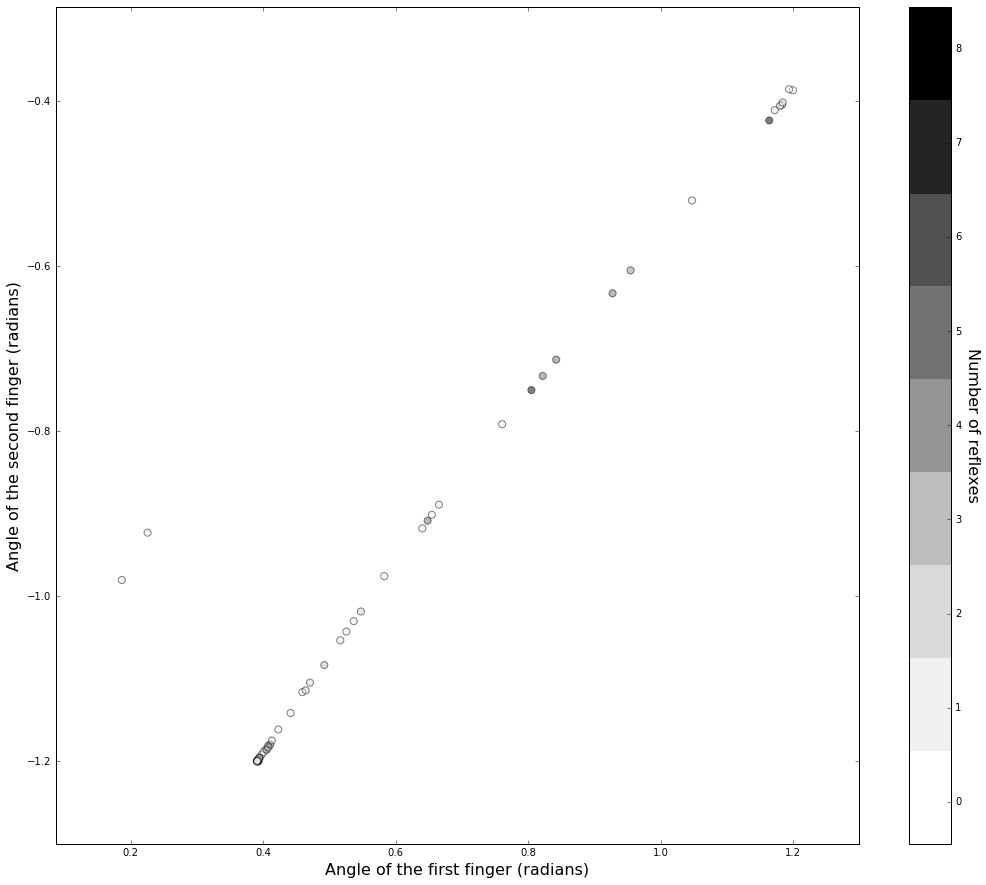

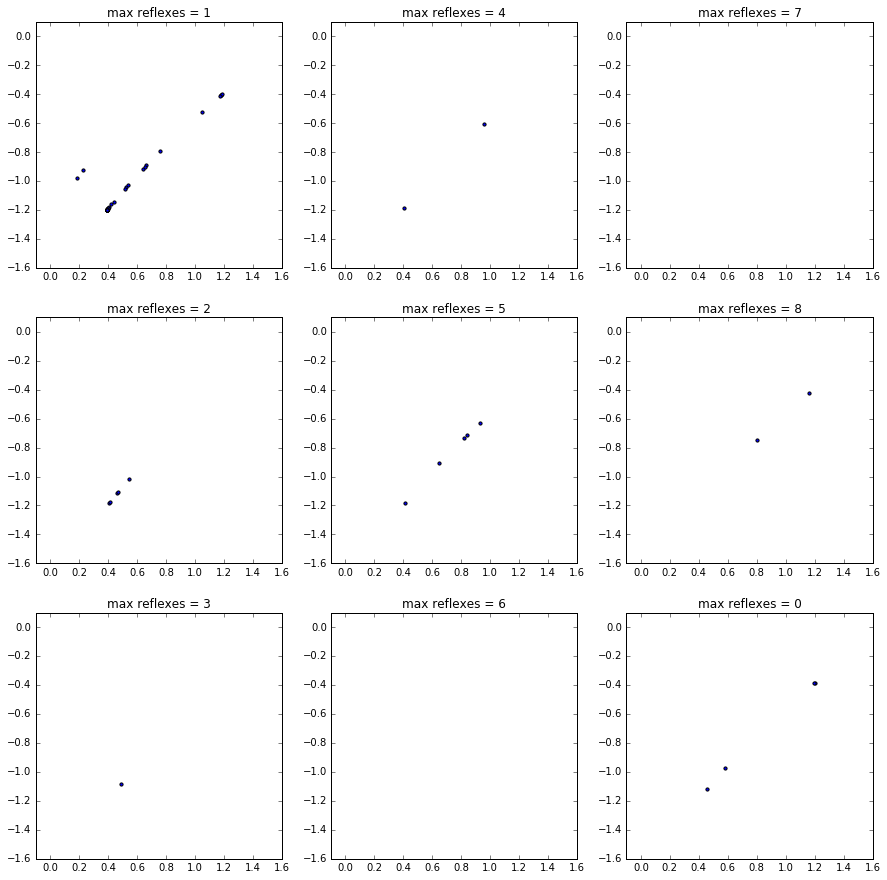

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors

def colorbar_index(ncolors, cmap):
    cmap = cmap_discretize(cmap, ncolors)
    mappable = cm.ScalarMappable(cmap=cmap)
    mappable.set_array([])
    mappable.set_clim(-0.5, ncolors+0.5)
    colorbar = plt.colorbar(mappable)
    colorbar.set_ticks(np.linspace(0, ncolors, ncolors))
    colorbar.set_ticklabels(range(ncolors))
    colorbar.ax.get_yaxis().labelpad = 18
    colorbar.set_label('Number of reflexes', fontsize=16, rotation=270)

def cmap_discretize(cmap, N):
    """Return a discrete colormap from the continuous colormap cmap.

        cmap: colormap instance, eg. cm.jet. 
        N: number of colors.

    Example
        x = resize(arange(100), (5,100))
        djet = cmap_discretize(cm.jet, 5)
        imshow(x, cmap=djet)
    """

    if type(cmap) == str:
        cmap = plt.get_cmap(cmap)
    colors_i = np.concatenate((np.linspace(0, 1., N), (0.,0.,0.,0.)))
    colors_rgba = cmap(colors_i)
    indices = np.linspace(0, 1., N+1)
    cdict = {}
    for ki,key in enumerate(('red','green','blue')):
        cdict[key] = [ (indices[i], colors_rgba[i-1,ki], colors_rgba[i,ki])
                       for i in xrange(N+1) ]
    # Return colormap object.
    return mcolors.LinearSegmentedColormap(cmap.name + "_%d"%N, cdict, 1024)

print "How many failures due to finger angles limits ?"
sum = 0
failIndexes = [i for i, elem in enumerate(Successes) if not elem]
failReflexes = [NumReflexes[i] for i in failIndexes]
failPosvec = [SuccessesPos[i] for i in failIndexes]
numTable = 0
numFloor = 0

for i,val in enumerate(Successes):
    if(val == False):
        if(Finger1[i] > 1.18 or Finger2[i] < -1.18):
            sum += 1
        else:
            if(SuccessesPos[i].z > 1):
                numTable += 1
            else:
                numFloor += 1
            
print "result: " + str(sum) + " (" + '{:.2%}'.format(float(sum)/float(len(Successes))) + ")"
print "number of failures in general: " + str(len(failIndexes)) 

print ""
print "What are the other failures ?"
print "Number of trials ended on the table: " + str(numTable)
print "Number of trials ended on the floor: " + str(numFloor)

fin1 = []
fin2 = []
color = []
m = max(failReflexes)
print "Max num of reflexes for failures: " + str(m)
print "Min num of reflexes for failures: " + str(min(failReflexes))
for i,val in enumerate(failReflexes):
    fin1.append(Finger1[failIndexes[i]])
    fin2.append(Finger2[failIndexes[i]])
    color.append(val)
        
fig = plt.figure(figsize=(18,15))
plt.scatter(fin1, fin2, c=color, cmap="Greys", marker='o', s=50,alpha=0.5)
plt.axis([min(fin1)-0.1, max(fin1)+0.1, min(fin2)-0.1, max(fin2)+0.1])
plt.xlabel('Angle of the first finger (radians)', fontsize=16, color='black')
plt.ylabel('Angle of the second finger (radians)', fontsize=16, color='black')
cmap = plt.get_cmap('Greys')
colorbar_index(ncolors=9, cmap=cmap)    
plt.show()

f, axarr = plt.subplots(3, 3)
f.set_size_inches((15,15))
for k in range(0,9):
    tabX = []
    tabY = []
    color = []
    
    for i, val in enumerate(failReflexes):
        if val == k:
            tabX.append(fin1[i])
            tabY.append(fin2[i])
            color.append(0)
    
    axarr[(k-1)%3,int((k-1)/3)].scatter(tabX, tabY, marker='o', s=10)
    axarr[(k-1)%3,int((k-1)/3)].axis([0-0.1, 1.5+0.1, -1.5-0.1, 0+0.1])
    axarr[(k-1)%3,int((k-1)/3)].set_title("max reflexes = " + str(k))

plt.show()